In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv(r"D:\Social_Network_Ads.csv")

In [3]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
dataset.isnull().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

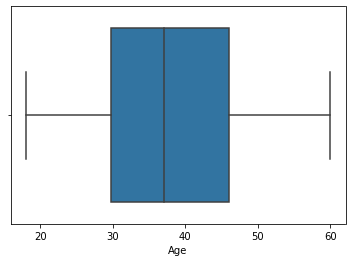

In [5]:
sns.boxplot(dataset["Age"])

In [6]:
x=dataset[["Age"]]

In [7]:
x

,Age
0,19
1,35
2,26
3,27
4,19
...,...
395,46
396,51
397,50
398,36


In [8]:
y=dataset["Purchased"]

In [9]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

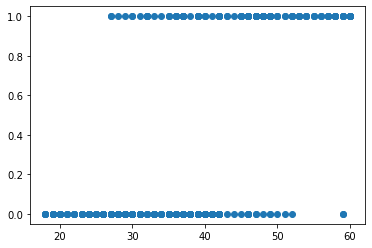

In [10]:
plt.scatter(x,y)

In [26]:
from sklearn.model_selection import train_test_split

In [48]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#### Scaling

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
#Init MinMax Scaler
sc=MinMaxScaler()

In [51]:
x_train=sc.fit_transform(x_train)

In [52]:
x_test=sc.transform(x_test)

#### Building the model

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
#Init the model
lor_model=LogisticRegression()

In [55]:
lor_model.fit(x_train,y_train)

LogisticRegression()

### Prediction

In [60]:
y_pred=lor_model.predict(x_test)

In [59]:
y_pred_prob=lor_model.predict_proba(x_test)[:,1]

In [75]:
y_pred=y_pred_prob>0.6

In [81]:
y_pred.astype("int")

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0])

Text(0, 0.5, 'Purchased')

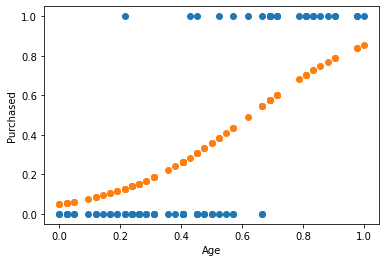

In [66]:
plt.scatter(x_test,y_test)
plt.scatter(x_test,y_pred_prob)
plt.xlabel("Age")
plt.ylabel("Purchased")

In [67]:
y_pred_train=lor_model.predict_proba(x_train)[:,1]

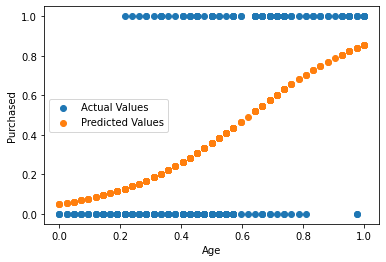

In [69]:
plt.scatter(x_train,y_train,label="Actual Values")
plt.scatter(x_train,y_pred_train,label="Predicted Values")
plt.xlabel("Age")
plt.ylabel("Purchased")
plt.legend()
plt.show()

### Evaluation

In [70]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

In [71]:
y_test

209    0
280    1
33     0
210    1
93     0
      ..
246    0
227    1
369    1
176    0
289    1
Name: Purchased, Length: 80, dtype: int64

In [72]:
from sklearn.metrics import accuracy_score

In [76]:
accuracy_score(y_test,y_pred)

0.85

In [77]:
y_pred

array([False,  True, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False,  True, False, False, False,  True, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False,  True, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False,  True,  True, False, False])